# ♡@$1^{\rm st}$ 👀 with Julia

Assuming you have already explored Julia, you should have already encountered the Julia REPL and is familiar with the following.
![Julia REPL image](./figs/Julia-REPL.png "REPL.jl")

## Hello World

The most common first program ever done is the "Hello, World!" program.
Unlike the lower-level languages, high(er)-level languages will require less inclusion or loading of modules, packages, or scripts.

In `c++` for example, we have the following `hello-world.cpp` file.
```
#include <iostream>

int main( void ){
    std::cout << "Hello, World! --c++" << std::endl;
    return 0;
}
```
Then an executable file (usually, `.exe` or `.e` file) is done in two steps: 
1. compile, and then
2. link/build.

The final output is usually `hello-world.e` (\*nix-based) or `hello-world.exe` (win*-based).

In `Julia` like most other higher-level languages, the script just contain as follows.

In [1]:
println("Hello, World! --Julia") 

Hello, World! --Julia


## Setting project environments

I suggest that each project `Project` have the following folder structure
```
/project
    /src
    /dat
    /out
```
Folder/Directory structure similar to this is automatically generated via the `Pkg.jl` package.

The module `Pkg.jl` is already --by default-- available in the Julia REPL environment.
The `Pkg` module is accessed via the `]` command as previously shown.
- `/src` directory contains all the `s`ou`rc`e files or --for REPL-enabled languages-- the scripts.
- `/dat` directory contains all data used by the `/project`.
For some, `/dat` contains onlly *source data* or input data in the processes done via the script.

In [2]:
] activate ../

  Activating environment at `~/Documents/GitHub/hello-julia/Project.toml`


In [3]:
] status

      Status `~/Documents/GitHub/hello-julia/Project.toml`
  [7073ff75] IJulia v1.23.2
  [91a5bcdd] Plots v1.22.3


# High-tech calculator

Julia also acts as a high-tech calculator.
In its basic state, contains the most common operations and functions.

In [4]:
1 + 2

3

In [5]:
5//3 + 9//2^3 ÷ 3//5

8//3

In [6]:
2pi + im

6.283185307179586 + 1.0im

In [7]:
α = 3pi/2
sin(α)

-1.0

# MATLAB in Julia

Julia comes with a linear algebra package based on the Basic Linear Algebra Subprograms ([BLAS](http://www.netlib.org/blas/)) wrapped via Linear Algebra PACKage [LAPACK](http://www.netlib.org/lapack/).
Tutorial on the Julia linear algebra is found at the [docs.julialang.org Linear Algebra section](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/).

The Julia `Base` already contains the basic linear algebraic operations.

As an example, let's solve the following matrix problem.

$$
\left[\begin{matrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{matrix}\right]
\left[\begin{matrix}
x_1\\
x_2\\
x_3
\end{matrix}\right]
=
\left[\begin{matrix}
b_1\\
b_2\\
b_3
\end{matrix}\right]
$$

or that

$$
\mathbf{A} \mathbf{x} = \mathbf{b}.
$$

In [8]:
A = rand(3,3)

3×3 Matrix{Float64}:
 0.90438    0.748916  0.452799
 0.0797729  0.906149  0.400973
 0.858479   0.61966   0.389063

In [9]:
b = rand(3)

3-element Vector{Float64}:
 0.7331809775080127
 0.2260133797358077
 0.635480895841684

The equation can then be solved via the following

$$\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}$$

with $\mathbf{A}^{-1}$ as the inverse of the matrix $\mathbf{A}$.

In [10]:
x = A \ b

3-element Vector{Float64}:
  -3.384877753683602
 -11.788627576447242
  27.877904161366043

...such that we can say:

In [11]:
A*x ≈ b

true

## Full linear algebra module
The linear algebra module of Julia is loaded via:

In [94]:
using LinearAlgebra

R(θ) = [ cos(θ) -sin(θ)
         sin(θ) cos(θ) ]

R (generic function with 1 method)

..and makes finding eigenvalues and eigenvectors calling the `eigen()` function.

In [96]:
e = eigen(R(2*pi/5))

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
2-element Vector{ComplexF64}:
 0.30901699437494745 - 0.9510565162951536im
 0.30901699437494745 + 0.9510565162951536im
vectors:
2×2 Matrix{ComplexF64}:
       0.0+0.707107im        0.0-0.707107im
 -0.707107-0.0im       -0.707107+0.0im

# Plotting

Plotting in Julia uses the front-end wrapper in `Plots` module.
The default backend is `gr()`.
[Other backends](https://docs.juliaplots.org/latest/backends/#backends) are also available.

In [108]:
using Plots

x = rand(100)
y = rand(100)
plt = scatter( x, y
    ,markersize=2
    ,markercolor=:black
    ,label="random locations"
    ,xlabel="position x"
    ,ylabel="position y"
)

savefig(plt,"../fig/random.png") #saves into a local directory

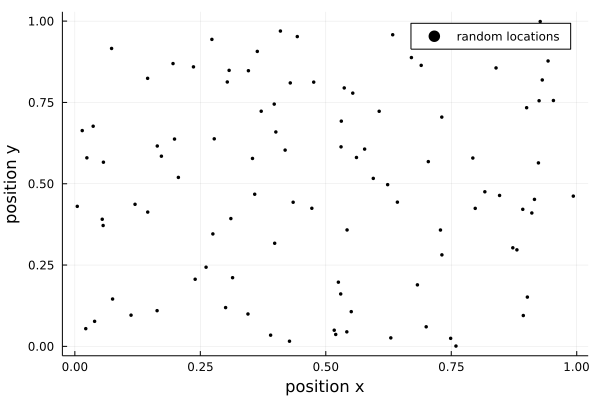

In [109]:
display(plt) #forces display of the **last** plt result

## Animation within Plots

..is simple to create

In [105]:
x = [ 0.1 0.1 1.1 0.1 
      0.1 1.1 0.1 0.1 ]
Θ = range(0.0,2.0*pi,length=101)

anim = @animate for theta in Θ
    y = R(theta) * x
    plt=plot(x[1,:], x[2,:], marker=:circle, label="P" )
    plot!(plt, y[1,:], y[2,:], marker=:square, label="P\'")
    plot!(plt
        , xlim=(-1.2,1.2), ylim=(-1.2,1.2)
        , aspect_ratio=1.0
    )
end

Animation("/var/folders/_s/m6248xzj6ldg_2cb04m4gs2c0000gn/T/jl_hxZSQp", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png", "000101.png"])

┌ Info: Saved animation to 
│   fn = /Users/johnrob/Documents/GitHub/hello-julia/src/figs/rotate.gif
└ @ Plots /Users/johnrob/.julia/packages/Plots/yfzIY/src/animation.jl:114


Plots.AnimatedGif("/Users/johnrob/Documents/GitHub/hello-julia/src/figs/rotate.gif")
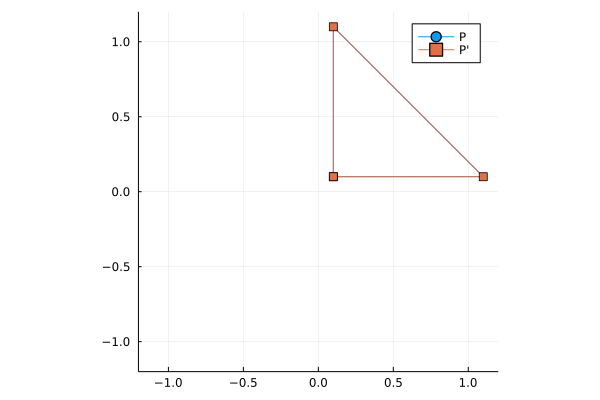

In [106]:
gif(anim,"./figs/rotate.gif",fps=5)